In [1]:
#Load Libraries
import pandas as pd

In [2]:
raw_df = pd.read_csv('./survey.csv')
# print(raw_df.head())

In [3]:
geo_var = raw_df.groupby(['Country',"treatment"])["seek_help"].count().reset_index()
# print(geo_var)

In [4]:
#Create Function
def geo_var(df, agg_col):
    geo_var = df.groupby(['Country',"seek_help"])["treatment"].count().reset_index()
    geo_var = geo_var.sort_values(agg_col, ascending=False)
    return geo_var

In [5]:
#Apply The Function to Different Mental Health Categories
geo_var_sh = geo_var(raw_df, "treatment")
yes_help = geo_var_sh[geo_var_sh["seek_help"] == "Yes"]
no_help = geo_var_sh[geo_var_sh["seek_help"] == "No"]
dontknow_help = geo_var_sh[geo_var_sh["seek_help"] == "Don't know"]
notefficent = geo_var_sh[(geo_var_sh["seek_help"] == "No") | (geo_var_sh["seek_help"] == "Don't know")]
notefficent_grouped = notefficent.groupby(['Country'])['treatment'].sum().reset_index()
notefficent_grouped = notefficent_grouped.sort_values('treatment', ascending=False)
# print(geo_var_sh)
# print("=" *40)
print(yes_help)
# print(no_help)
# print(dontknow_help)
# print(notefficent_grouped)

           Country seek_help  treatment
75   United States       Yes        189
72  United Kingdom       Yes         26
12          Canada       Yes          9
2        Australia       Yes          8
27         Germany       Yes          4
47     Netherlands       Yes          3
34         Ireland       Yes          3
68     Switzerland       Yes          2
49     New Zealand       Yes          2
66          Sweden       Yes          1
37          Israel       Yes          1
5     Bahamas, The       Yes          1
54          Poland       Yes          1


In [6]:
#Import MatPlotLib Library
import matplotlib.pyplot as plt

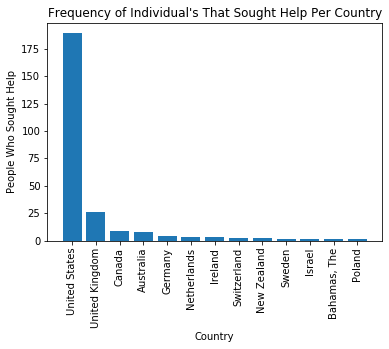

In [7]:
#Chart Characteristics - Yes: Sought Help
fig, ax = plt.subplots()
ax.bar(x=yes_help.Country,height=yes_help.treatment)
plt.title("Frequency of Individual's That Sought Help Per Country")
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel('People Who Sought Help')
plt.show()

In [8]:
# #Chart Characteristics - No Help Sought or Unaware (All Countries in Dataset)
# fig, ax = plt.subplots()
# ax.bar(x=notefficent_grouped.Country,height=notefficent_grouped.treatment)
# plt.title("People Who Didn't Seek Help or Were Unaware of Help Per Country")
# plt.xticks(rotation='vertical')
# plt.xlabel('Country')
# plt.ylabel("# of People")
# # plt.show()

In [9]:
compare_country = list(yes_help.Country.unique())
yes_help2 = notefficent_grouped[notefficent_grouped["Country"].isin(compare_country)]
print(yes_help2)

           Country  treatment
44   United States        562
43  United Kingdom        159
6           Canada         63
16         Germany         41
27     Netherlands         24
20         Ireland         24
0        Australia         13
28     New Zealand          6
32          Poland          6
40          Sweden          6
41     Switzerland          5
21          Israel          4


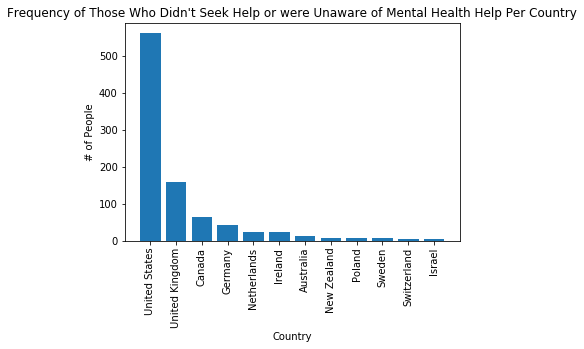

In [10]:
#Chart Characteristics - No Help Sought or Unaware
fig, ax = plt.subplots()
ax.bar(x=yes_help2.Country,height=yes_help2.treatment)
plt.title("Frequency of Those Who Didn't Seek Help or were Unaware of Mental Health Help Per Country")
plt.xticks(rotation='vertical')
plt.xlabel('Country')
plt.ylabel("# of People")
plt.show()